<a href="https://colab.research.google.com/github/LinaTawfik/FaceSpace/blob/master/UWOltawfik_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Defenition 

This project is for the [Kaggle Titanic: Machine Learning from Disaster competition](https://www.kaggle.com/c/titanic). Bellow is a brief description of the problem taken from the Overview section of the competion.


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will complete the analysis of what sorts of people were likely to survive by applying the tools of machine learning to predict which passengers survived the tragedy.

# Collecting Data
The data is downloaded from the [Data](https://www.kaggle.com/c/titanic/data) section of the competion. 
The data has been split into two groups, the training set (train.csv) and test set (test.csv). The training set will be used to build the machine learning models where the outcome (also known as the “ground truth”) is provided for each passenger. The test set will be used to see how well the model performs on unseen data. For the test set, the ground truth is not provided for each passenger and it is the model's job to predict these outcomes. 



** Loading Train and Test Data Using Panadas**

We will use Pandas since it makes it easy to  visualize the data sets

First, you will need to upload the train.csv and test.csv files into the Files section for each new session

In [0]:
import pandas as pd
train=pd.read_csv('/train.csv')
test=pd.read_csv('/test.csv')

# Data Analysis

**Train Data Set**

First, we will print the first 5 rows of the train data set to understand how the train data set is structured
As we can see by running train.head() and train.shape code cells below, we have 12 features (columns) describing our train data and 891 passengers (rows).

To better understand these feautres, the [Data Dictionary](https://www.kaggle.com/c/titanic/data) gives us a break down of the meaning of each feature, as seen below:

We here give the Variable Name,	Definition, Key (if applicable)

survival,	Survival,	0 = No, 1 = Yes
pclass,	Ticket class,	1 = 1st, 2 = 2nd, 3 = 3rd
sex,	Sex	
Age,	Age in years	
sibsp,	# of siblings / spouses aboard the Titanic	
parch,	# of parents / children aboard the Titanic	
ticket,	Ticket number	
fare,	Passenger fare	
cabin,	Cabin number	
embarked,	Port of Embarkation,	C = Cherbourg, Q = Queenstown, S = Southampton

***
Further Explanation of some variables:

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Note: when looking at the entries, we can see NaN which means this field is missing in the data. We will need to fill out these fields using feature engineering (later expalined) or delete the entire row

**Test Data Set**

By running train.head() and test.shape code cells below, we can see that we have 418 passengers (rows) and only 11 features (columns) with the survived field from the training data set missing. This is because we will use this set to predict if the passenger survived or not. 


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

running train.info() and test.info() can be usefull as they give us information on how many missing fields we have in each data set.
From running train.info() in the code cell below, we have 891 entries but Age has only 714 entries and Cabin has only 204. Therefore, we have missing fields for Age and Cabin in the train data set.
From running test.info() in the code cell below, we have 418 entries but Age is 332, Fare is 417 and Cabin is 91.

The missing information will be filled out using feauture engineering later in the notebook.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


train.isnull().sum() and test.isnull().sum() will give us the sum of null values in the data set. It is usefull since by running train.isnull().sum() below, we can see that we have 177 null Age entries and 687 null Cabin entries. This tells us that the NaN values we saw in the table when running train.head() above were null. Similar analysis can be done by running test.isnull().sum(), we get 86 null values for Age and 327 for Cabin. This information will be usefull when applying feauture engineering. 

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Import seaborn Python library for visualizing data relations**

we will set seaborn as the deafult lib for plots

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as ans
ans.set() 

**Bar Charts of Categorical Features **

Below, we will plot each of the following categorical features for survived vs did_not_survive to examine which feature implies the passenger was more likely to survive. 

The features are:

Pclass                  
Sex                        
SibSp          
Parch                         
Cabin          
Embarked

For the rest of the features, we will examine them after filling out the missing values using feature engineering in the next section

In [0]:
def chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

**Bar Graph for Categorical Feature: Sex **

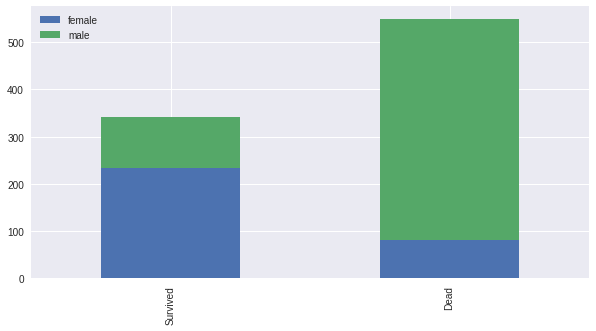

In [13]:
chart('Sex')

By examining the plot generated from the code above, we can see that female is more likely to survive than male

**Bar Graph for Categorical Feature: Pclass**

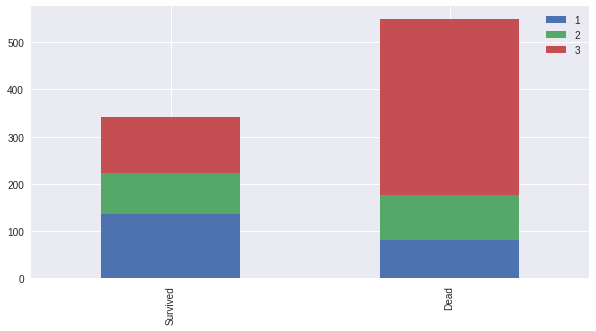

In [14]:
chart('Pclass')

By examining the plot generated from the code above, we can see that 1st class was the most likely to survive between all class while third class was more likely to die between all other classes. Reasons can be that third class cabins are on the lower levels of the ship while first class are on the higher levels. 

**Bar Graph for Categorical Feature: SibSp**

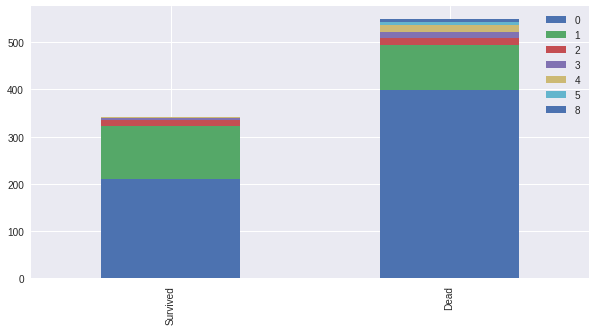

In [15]:
chart('SibSp')

By examining the plot generated from the code above, we can see that people who had more than 2 siblings or spouse were more likley to survive than those with less than 2 or none

**Bar Graph for Categorical Feature: Parch**

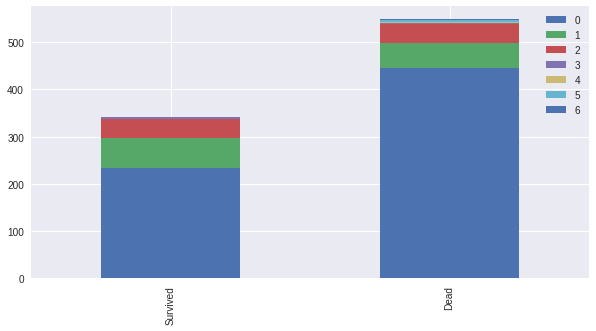

In [16]:
chart('Parch')

By examining the plot generated from the code above, we can see that people who had more than 2 parents or children were more likley to survive than those with less than 2 or none

**Bar Graph for Categorical Feature: Embarked**

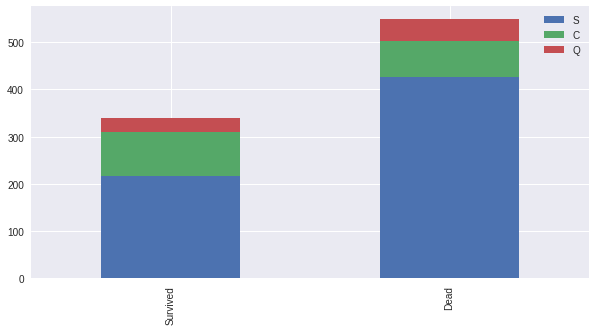

In [17]:
chart('Embarked')

By examining the plot generated from the code above, we can see that people who embarked from port C more likely survived than those from ports S and Q. This could be becuase port C has a higher ratio of people from the higher class than the other ports

# Feature Engineering

In this section, we will be using the domain knowledge we have of the data set to create feature vectors to use in the machine learning algorithms. The main outcomes we want from this section is to fill out missing fields, change texts to numerical values to use in the machine learning classifier (eg. change Sex from female/male to 0/1) and modify and extract data from non informative features (eg. extract title 'Mr" from Name to get the Sex of the passenger').

The feature vector contains the numerical features that represent the object of interest. This allows us to have a numerical represetation of objects which means we can do processing and statitistical analysis on the information we have. More information about feature vectors can be found on the [Feature wikipedia](https://en.m.wikipedia.org/wiki/Feature_(machine_learning) page. 

We will do our feature engineering on both the train and test datasets to fill in the missing information in both conisistently. This will be done by combining the datasets.

**Name Feature Engineering**

we will extract the title from the name feature to determine the sex of the passenger and their marital status.

In [0]:
train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

We will display the number of occurences of each differnt title in the name feature in the code cell below

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

By running the two code cells above, we can see the first three values Mr, Miss and Mrs are usefull in determining the gender of the passenger. The remaining values are not indicative and therfore will be ignored.

To be able to classify the titles, we wall map them to the follwoing numerical values from 0-3 for Ms, Miss, Mrs and everything else grouped together, repectively. 

In [0]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Now that we have extracted the title from the Name feaature in both data sets, we can drop the Name feature from the datasets and use the Title instead. this is done in the following code cell

In [0]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

The following code gives the bar chart of the survived vs did_not_survive for the different name titles that we have classified above. As we can see, blue (Mr) has a high chance to die while green and red (Miss and Mrs) have a higher chance to survive. This is consistent with our data analysis of sex Female vs Male previously.

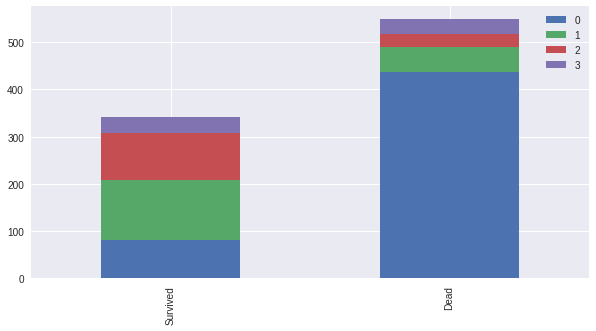

In [23]:
chart('Title')

We can now look at the first 5 entries for each data set with the Name feature dropped and the Title feature added instead

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


**Sex Feature Engineering**

We will map the passenger's sex as 0 if male and 1 if female in both data sets to have numerical values. 

In [0]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

The bar chart for the Sex feature can be seen by runnning the code in the following code cell, with 0 and 1 as the two values. Consistent with our previos findings, male are moe likely to die than female. 

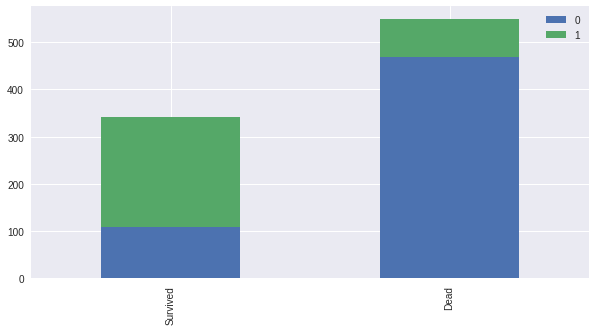

In [27]:
chart('Sex')

**Age Feature Engineering**

There are multiple age values missing in the data set we have. We don't have any other features available to fill in these missing values so a close assumption should be made to fill in these value. We can use the median or average of the Age in the data set to fill in the null values. We will use the median age value of that Title group to get a close approximation. 

In [0]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

Need to explain

In [29]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

The following code gives a chart for age vs the survival status for that age group where 1 (green) is survived and 0 (blue) is did not survive. 

As we can see from the graph, passengers upto ~16 years old have a higher chance to survive, passengers  between ~24 years old and ~33 years old have a higher chance to die, passengers between ~33 years old and ~42 years old have a higher chance to survive, passengers between ~42 years old and ~47 years old have a higher chance to die, passengers between ~47 years old and ~60 years old have a higher chance to survive and passenger 60+ years old have a higher chance to die

To get a closer look on the graph, the code that follows zooms into the different slices of the graph. 

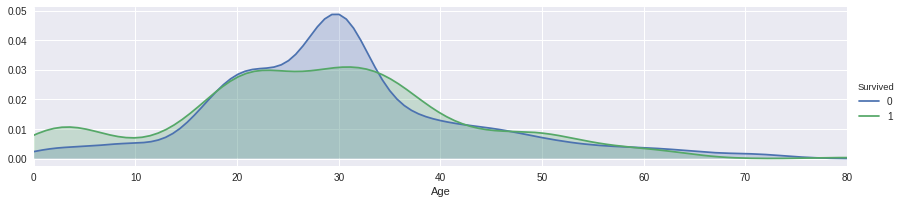

In [30]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

Zooming from 0 to 20 years old

(0, 20)

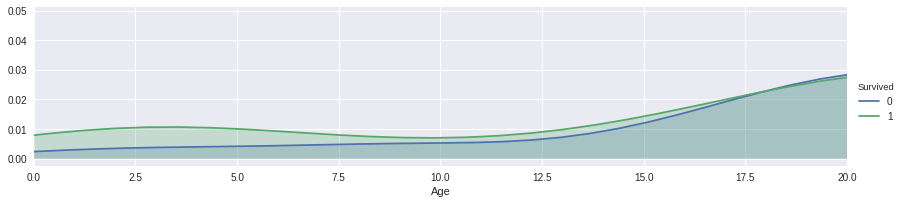

In [31]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

Zooming from 20 to 40 years old

(20, 40)

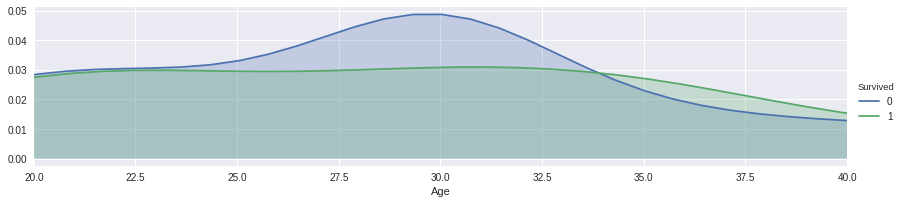

In [32]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)

Zooming from 40 to 60 years old

(40, 60)

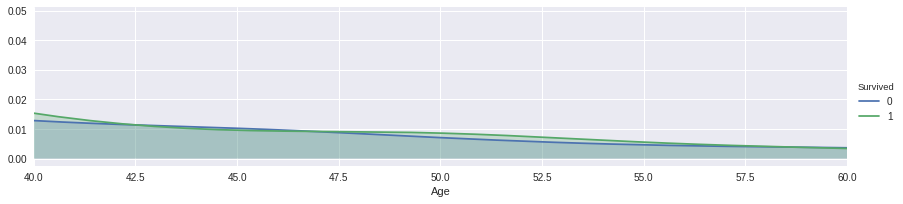

In [33]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

Zooming from 60 to 80 year old

(60, 80)

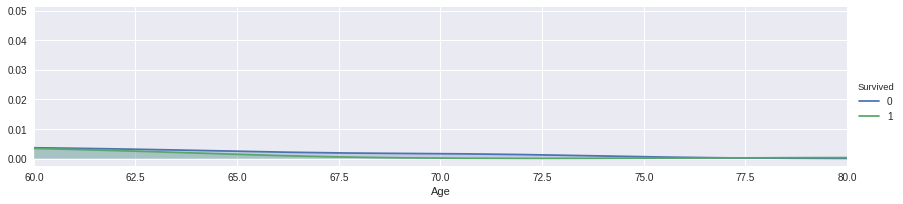

In [34]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)

Grouping Age into Categories

Based on our observations above, different age categories have different chances of survival. We will group numercial age values to numerical categories as following:

0: 0 <= Age <= 16

1: 16< Age <= 26

2: 26 < Age <= 36

3: 36 < Age <= 62

4: 62 < Age

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

 We can see by displaying the first five entries in our training data set, the Age feature now has the 0-4 category value we have assigned above.

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


We can graph the bar chart for the differnt age groups to varify our observation of how likely a group age is to survive. Without grouping age ranges together, it will be very difficult to look at each age number alone and it will be difficult to classify. 

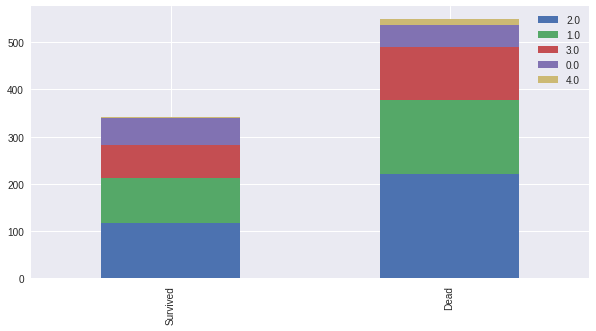

In [37]:
chart ('Age')

**Embarked Feature Engineering**

Embarked feature tells us where the passenger aborted the ship. Different cities can have different financial status and therefore one class can be more likely to abort from once city vs the other. We will first look at the charts for each port with the different classes that aborted at that port in the code cell below. As we can see, very few 1st and secod class passengers aborted from port Q. Over 50% from all classes aborted from port S. Therefore, we will fill in any missing Embarked value as S port. We will then change the text Embarked feature to a numerical value. 

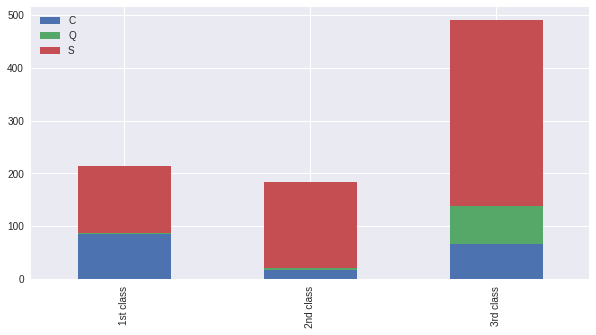

In [38]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

We can view the Embarked feature changed to a numerical value by running the code cell below. Most values will be 0 since "S" port counts for more than 50% of all Embarked values

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


**Fare Feature Engineering**

The fare paid by the passanger is closely related to the Pclass value. Thefore, we can use the relationship between these two values by using the median value for each class to fill in the missing values for the fare.

In [0]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

The following code gives a chart for Fare vs the survival status for all passengers where 1 (green) is survived and 0 (blue) is did not survive.

As we can see from the graph, passengers who paid a lower fare were much more likely to die than those who paid more for their ticket.

To get a closer look on the graph, the code that follows zooms into the different slices of the graph.

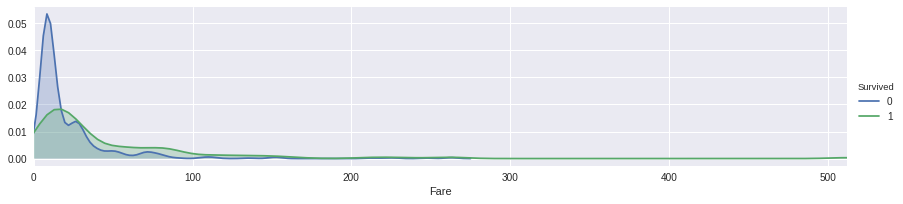

In [43]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

Zooming from 0 to 50 fare value

(0, 50)

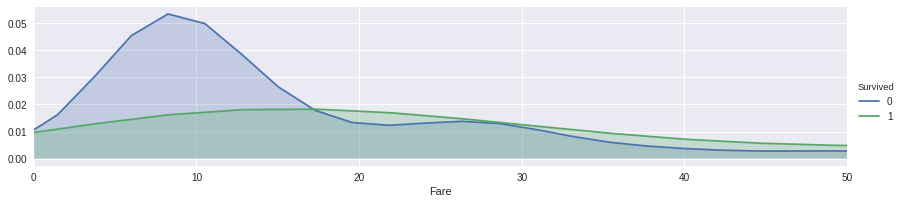

In [44]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 50)

Zooming from 50 to 100 fare value

(50, 100)

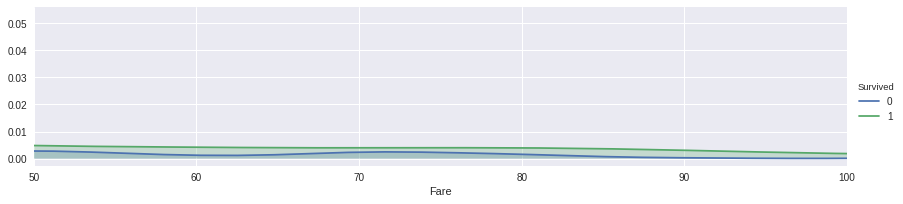

In [45]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(50, 100)

Grouping Fare into Categories

Based on our observations above, different Fare categories have different chances of survival. We will group numercial Fare values to numerical categories as following:

0: 0 <= Fare <= 17

1: 17 < Fare <= 30

2: 30 < Fare <= 100

3: 100 < Fare

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

We can see by displaying the first five entries in our training data set, the Fare feature now has the 0-3 category value we have assigned above.

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


**Cabin Feature Engineering**

Cabin gives the passenger room in the ship. First class cabins will have a higher possibility to survive than lower class cabins. By using the value_counts() function to check the cabin values in the code cell below, we can see that the first value is a character while the remaining values are numbers (eg: E25). Most likely, the character value is what refferes to the different type of room/floor or section in the ship while the number is to differentiate adjacent rooms. Therefore, we will use the first character value in the cabin name to see what effect it has on the survival chance of the passenger. 

In [48]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
E101           3
F33            3
D              3
E67            2
D20            2
C125           2
B22            2
F G73          2
C126           2
C2             2
B5             2
E44            2
C93            2
C92            2
B49            2
E24            2
C52            2
D26            2
D35            2
E121           2
B18            2
C65            2
E8             2
F4             2
D17            2
              ..
D49            1
C118           1
C103           1
B86            1
A24            1
D56            1
E12            1
F E69          1
D48            1
E10            1
A6             1
B79            1
D9             1
C90            1
E40            1
F38            1
C95            1
C101           1
C45            1
D10 D12        1
D37            1
C62 C64        1
A36            1
B101           1
B37            1
E50            1
C54            1
D11           

Extracting the first character in the Cabin string values

In [0]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

The following code cell graphs the different Cabin character values for each class. As we can see, the different classes have different cabin characters.

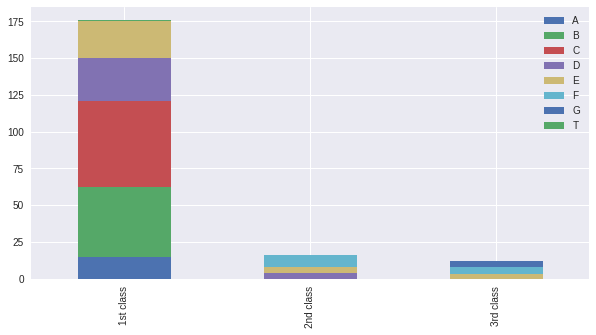

In [50]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

This information can be  usefull in classifying the different classes or fares. we will need to map the characters to numerical values and in order to give a smilar range for each features, we will keep the range between 0 and 3 for the classifier to work properly. This technique is known as feature scalling.It is is a method used to standardize the range of independent variables or features of data. For example, for male/female information we used 0 and 1, meaning we have a difference of 1 between the two values. For fare values for example with a range betweeen 0 and 500, a difference of 10 is less infomative than a difference of 1 in Sex values.This is why we have to scale our features accordingly.  More information on feature scaling can be found on the [Wikipedia page](https://en.wikipedia.org/wiki/Feature_scaling). 

In [0]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

We will now fill the missing Fare data using the median value of each Pclass.

In [0]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

**FamilySize Feature Engineering**

We will see how the Family Size of a passenger effects their likelyhood of survival. To get the full family size, we will use the value of 1 (the passenger himself) +  SibSp (sibling and spouse count) + parch (parent and children count).

In [0]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

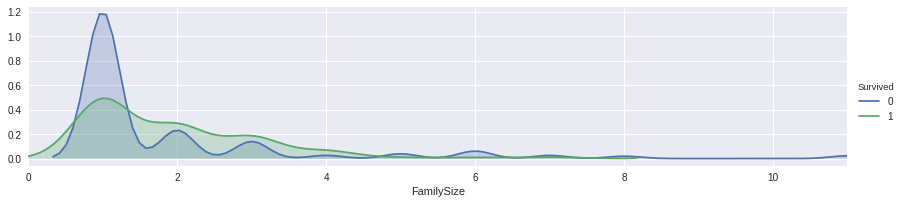

In [54]:
facet = ans.FacetGrid(train, hue="Survived",aspect=4)
facet.map(ans.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

 As we cann see from the plot above, passengers who aborted the ship alone (FamilySize=1) have a much higher chance of dying than those with a larder FamilySize

We will map the familySize to a numerical value with a range of 0-4 

In [0]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

**Reamining Features Engineering**

The remaining features inlcude the ticket which does not have usefull information that we can use, SibSp and Parch which we have used in the familySize feature above. Therefore, we wil drop the three features from our datasets. 

In [0]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

Finally, this is the final Feature vector we have for the train data with only numerical values that we can use. to train, validate and test.   

In [57]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [58]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


# Modelling

 We will use different classifiers to predict the survival of the passengers in the Titanic test data set using the feature vectors we have generated in the previous section.
 

 First classifier:  [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)
 
 Second classifier:  [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
 
 Third classifier: [Random forest](https://en.wikipedia.org/wiki/Random_forest)
 
 Fourth classifier: [Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
 
 Fifth classifier: [Support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine)
 
 Sixth classifier: [K-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
 *******
We will then use [k-fold cross validation ](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) to ensure that our model has received the correct patterns from our data set. 

First, we will import the classifier models 

In [0]:
# Importing Classifier Modules
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


**K-fold Cross Validation**

Import k-fold for cross validation and use cross_val_score. we will use 10 splits. 

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)  

**Multilayer Perceptron Classifier**


In [62]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(50,50), random_state=1)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.82022472 0.7752809  0.78651685 0.87640449 0.80898876
 0.7752809  0.78651685 0.76404494 0.80898876]


Multilayer Perceptron Percentage Score 

In [63]:
round(np.mean(score)*100, 2)

80.58

**Naive Bayes Classifier**

In [64]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


Naive Bayes Percentage Score 

In [65]:
round(np.mean(score)*100, 2)

78.78

**Decision Tree Classifier**

In [66]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.88764045 0.75280899
 0.82022472 0.82022472 0.75280899 0.79775281]


Decision Tree Percentage Score 

In [67]:
round(np.mean(score)*100, 2)

79.69

**Random Forest Classifier**

In [68]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.79775281 0.82022472 0.7752809  0.86516854 0.78651685
 0.84269663 0.79775281 0.74157303 0.79775281]


Random Forest Percentage Score 

In [69]:
round(np.mean(score)*100, 2)

80.02

**SVM Classifier**

In [70]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
round(np.mean(score)*100,2)

83.5

**KNN Classifier**

In [72]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


kNN Percentage Score 

In [73]:
round(np.mean(score)*100, 2)

82.6

# Testing

Based on the percentage scores obtained from the different classifiers, the support vector machine or SVC gave us the highest score of 83.5%. Therfore, we will use SVC for the test data set.

In [74]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
